In [1]:
!python --version

Python 3.7.12


In [2]:
!pip install numpy sklearn pandas matplotlib

In [3]:
import pandas as pd
from math import exp
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./data/student_univ.csv', header=None)

In [5]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
X = df.iloc[:,0:2]
Y = df[2]

In [8]:
X.head()

,0,1
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [9]:
Y.head()

0    0
1    0
2    0
3    1
4    1
Name: 2, dtype: int64

In [10]:
#Normalization : MinMaxNormalization
for i in range(len(X)):
    X[0] =  (X[0] - X[0].min()) / (X[0].max() - X[0].min()) 
    X[1] =  (X[1] - X[1].min()) / (X[1].max() - X[1].min()) 

In [11]:
X.head()

,0,1
0,0.065428,0.694655
1,0.003266,0.194705
2,0.082968,0.619618
3,0.431764,0.816001
4,0.701943,0.655392


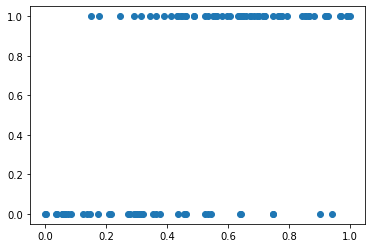

In [12]:
plt.scatter(X[0],Y)
plt.show()

In [14]:
def predict(X, b):
    '''
    desc : uses signmoid function makes a prediction
    input :
        X : dependent variable
        b : coefficients
    output : list of predicted vaues
    '''
    preds = []
    for x1, x2 in zip(X.iloc[:,0], X.iloc[:,1]):
        x = (b[0]) + (b[1]*x1) + (b[2]*x2)
        preds.append(1/ (1 + exp(x * -1)))
    return preds

In [15]:
def grad_desc(X, Y, b, preds, L=0.001):
    '''
    desc : gradient descent - calculates new coefficients
    input :
        X : dependent variable
        Y : independent variable
        b : initial coeffs
        preds : predicted values
        L : learning rate
    returns : new coefficients
    '''    
    for i in range(len(b)):
        for j, (y, pred, x1, x2) in enumerate(zip(Y, preds, X.iloc[:,0], X.iloc[:,1])):
            temp = L * (y - pred) * (pred) * (1 - pred)
            if(i == 1):
                temp *= x1
            elif(i == 2):
                temp *= x2
            b[i] += temp
    return b

In [16]:
def log_reg(X, Y, b, L=0.001, epochs=3):
    '''
    desc : driver function - logistic regression
    input :
        X : dependent variable
        Y : independent variable
        b : initial coeffs
        L : learning rate
        epochs : no. of iterations
    '''
    for epoch in range(epochs):
        y_pred = predict(X, b)
        b = grad_desc(X, Y, b, y_pred, L)
    return b

## Training

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=555)

In [19]:
X_train.head()

,0,1
11,0.644338,0.000000
35,0.352252,0.316564
3,0.431764,0.816001
43,0.749759,0.146705
87,0.650989,0.876295


In [20]:
y_train.head()

11    0
35    0
3     1
43    0
87    1
Name: 2, dtype: int64

In [21]:
b = [1,0.5,0.5]
L = 0.3

In [22]:
b = log_reg(X_train, y_train, b, L, epochs=5)

In [23]:
b

[-0.9949297558718839, 1.2152977798092162, 0.9847366991841826]

## Testing

In [24]:
y_pred = predict(X_test, b)

y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

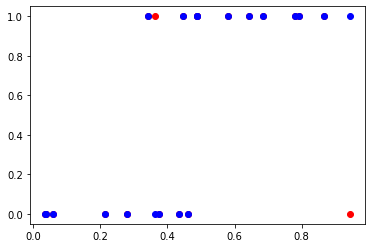

In [26]:
plt.scatter(X_test[0], y_test, c='red')
plt.scatter(X_test[0], y_pred, c='blue')
plt.show()

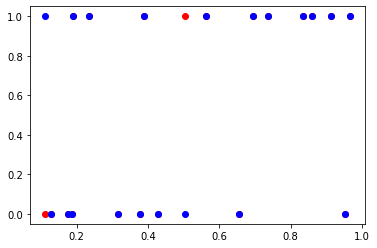

In [27]:
plt.scatter(X_test[1], y_test, c='red')
plt.scatter(X_test[1], y_pred, c='blue')
plt.show()

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(confusion_matrix(y_test, y_pred))

[[ 8  1]
 [ 1 10]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20

